In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import json
import seaborn as sns


In [715]:
df = pd.read_csv('data/train.csv')
df.head()
df_test = pd.read_csv('data/test.csv') 

In [716]:
df.describe()
        

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [717]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [719]:
df = df.dropna()

In [720]:
df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",http://www.magnetreleasing.com/vhs/,tt2105044,en,V/H/S,When a group of misfits is hired by an unknown...,7.820787,...,7/28/12,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This collection is killer.,V/H/S,"[{'id': 6435, 'name': 'webcam'}, {'id': 9706, ...","[{'cast_id': 1, 'character': 'Gary', 'credit_i...","[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 99, 'nam...",http://www.magpictures.com/profile.aspx?id=983...,tt0380268,en,Cocaine Cowboys,"In the 1980s, ruthless Colombian cocaine baron...",2.941626,...,4/26/06,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How Miami became the cocaine capital of the Un...,Cocaine Cowboys,"[{'id': 2150, 'name': 'cocaine'}, {'id': 2231,...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe46179251416c7506cc15', 'de...",163000
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.iceagemovies.com/films/ice-age-the-...,tt0438097,en,Ice Age: The Meltdown,"Diego, Manny and Sid return in this sequel to ...",16.646029,...,3/23/06,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ice age is melting away.,Ice Age: The Meltdown,"[{'id': 2078, 'name': 'mammoth'}, {'id': 2079,...","[{'cast_id': 1, 'character': 'Manny (voice)', ...","[{'credit_id': '52fe4292c3a36847f80292c9', 'de...",660940780
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/#/our-titles/233/Casino-Roy...,tt0381061,en,Casino Royale,"Le Chiffre, a banker to the world's terrorists...",23.065078,...,11/14/06,144.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,"[{'id': 131, 'name': 'italy'}, {'id': 383, 'na...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '53ac1fd7c3a3684bc8001908', 'de...",599045960
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thefastandthefurious3.com/,tt0463985,en,The Fast and the Furious: Tokyo Drift,"In order to avoid a jail sentence, Sean Boswel...",2.238808,...,6/3/06,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On the streets of Tokyo, speed needs no transl...",The Fast and the Furious: Tokyo Drift,"[{'id': 830, 'name': 'car race'}, {'id': 1926,...","[{'cast_id': 12, 'character': 'Sean Boswell', ...","[{'credit_id': '56784ed792514111900002c8', 'de...",158468292
75,76,"[{'id': 230161, 'name': 'Fright Night (Reboot)...",17000000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",http://www.welcometofrightnight.com,tt1438176,en,Fright Night,A teenager suspects his new neighbour is a vam...,9.665251,...,8/18/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can't run from evil when it lives next door.,Fright Night,"[{'id': 813, 'name': 'sunrise'}, {'id': 3133, ...","[{'cast_id': 9, 'character': 'Charley Brewster...","[{'credit_id': '52fe4956c3a36847f8194f53', 'de...",24922237
90,91,"[{'id': 2883, 'name': 'Kill Bill Collection', ...",30000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.miramax.com/movie/kill-bill-volume-1/,tt0266697,en,Kill Bill: Vol. 1,An assassin is shot at the altar by her ruthle...,25.261865,...,10/10/03,111.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go for the kill.,Kill Bill: Vol. 1,"[{'id': 233, 'name': 'japan'}, {'id': 732, 'na...","[{'cast_id': 3, 'character': ""Beatrix 'The Bri...","[{'credit_id': '

In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 22 to 2984
Data columns (total 23 columns):
id                       203 non-null int64
belongs_to_collection    203 non-null object
budget                   203 non-null int64
genres                   203 non-null object
homepage                 203 non-null object
imdb_id                  203 non-null object
original_language        203 non-null object
original_title           203 non-null object
overview                 203 non-null object
popularity               203 non-null float64
poster_path              203 non-null object
production_companies     203 non-null object
production_countries     203 non-null object
release_date             203 non-null object
runtime                  203 non-null float64
spoken_languages         203 non-null object
status                   203 non-null object
tagline                  203 non-null object
title                    203 non-null object
Keywords                 203 non-null 

In [722]:
#df_filmes['year'] = df_filmes.year.str.extract('(\d\d\d\d)',expand=False)


#df['genres'] = df['genres'].str.extract('(:\s.[A-Za-z].*)',expand=False)
#filmes = df.genres.str.split(':')
#for i in df['genres']:
#    df['genres'] = df['genres'].str.extract('(:\s.[A-Za-z].*)',expand=False)

In [723]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",http://www.magnetreleasing.com/vhs/,tt2105044,en,V/H/S,When a group of misfits is hired by an unknown...,7.820787,...,7/28/12,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This collection is killer.,V/H/S,"[{'id': 6435, 'name': 'webcam'}, {'id': 9706, ...","[{'cast_id': 1, 'character': 'Gary', 'credit_i...","[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 99, 'nam...",http://www.magpictures.com/profile.aspx?id=983...,tt0380268,en,Cocaine Cowboys,"In the 1980s, ruthless Colombian cocaine baron...",2.941626,...,4/26/06,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How Miami became the cocaine capital of the Un...,Cocaine Cowboys,"[{'id': 2150, 'name': 'cocaine'}, {'id': 2231,...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe46179251416c7506cc15', 'de...",163000
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.iceagemovies.com/films/ice-age-the-...,tt0438097,en,Ice Age: The Meltdown,"Diego, Manny and Sid return in this sequel to ...",16.646029,...,3/23/06,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ice age is melting away.,Ice Age: The Meltdown,"[{'id': 2078, 'name': 'mammoth'}, {'id': 2079,...","[{'cast_id': 1, 'character': 'Manny (voice)', ...","[{'credit_id': '52fe4292c3a36847f80292c9', 'de...",660940780
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/#/our-titles/233/Casino-Roy...,tt0381061,en,Casino Royale,"Le Chiffre, a banker to the world's terrorists...",23.065078,...,11/14/06,144.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,"[{'id': 131, 'name': 'italy'}, {'id': 383, 'na...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '53ac1fd7c3a3684bc8001908', 'de...",599045960
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thefastandthefurious3.com/,tt0463985,en,The Fast and the Furious: Tokyo Drift,"In order to avoid a jail sentence, Sean Boswel...",2.238808,...,6/3/06,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On the streets of Tokyo, speed needs no transl...",The Fast and the Furious: Tokyo Drift,"[{'id': 830, 'name': 'car race'}, {'id': 1926,...","[{'cast_id': 12, 'character': 'Sean Boswell', ...","[{'credit_id': '56784ed792514111900002c8', 'de...",158468292


In [724]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.151616,0.080323,0.071495,0.078997
budget,0.151616,1.000000,0.305474,0.509517,0.787999
popularity,0.080323,0.305474,1.000000,0.296880,0.414928
runtime,0.071495,0.509517,0.296880,1.000000,0.564921
revenue,0.078997,0.787999,0.414928,0.564921,1.000000


Text(0.5, 1.0, 'Receita')

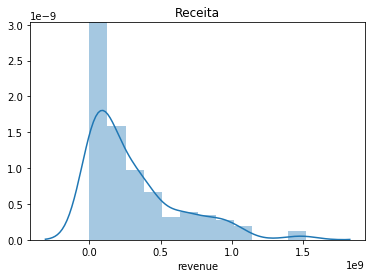

In [725]:
ax = sns.distplot(df['revenue'])
ax.set_title('Receita')

Text(0.5, 1.05, 'Disperção entre as variaveis')

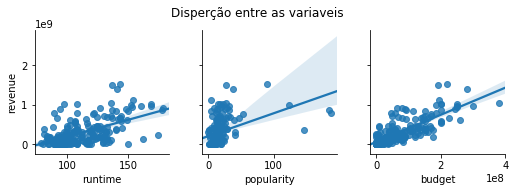

In [726]:
ax = sns.pairplot(df,y_vars='revenue',x_vars=['runtime','popularity','budget'],kind='reg')
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Text(0.5, 1.0, 'Receita')

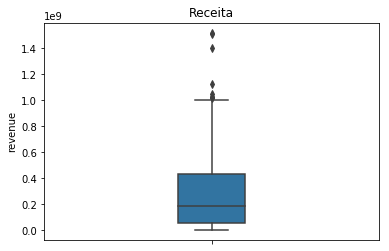

In [727]:
ax = sns.boxplot(df['revenue'],orient='v',width=0.2)
ax.set_title('Receita')


Text(0.5, 1.0, 'Duração')

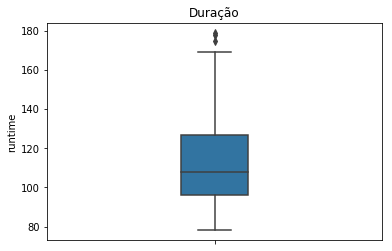

In [728]:
ax = sns.boxplot(df['runtime'],orient='v',width=0.2)
ax.set_title('Duração')


Text(0.5, 1.0, 'Duração')

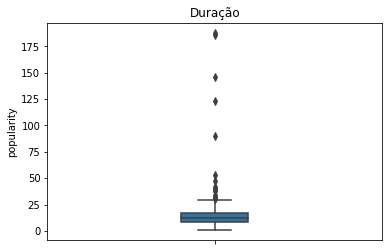

In [729]:
ax = sns.boxplot(df['popularity'],orient='v',width=0.2)
ax.set_title('Duração')

In [730]:
from sklearn.model_selection import train_test_split

In [731]:
import numpy as np

In [732]:
y = df['revenue']
x=df[['runtime','budget','popularity']]

In [733]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [734]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [735]:
modelo = LinearRegression()

In [736]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [737]:
print('R quadrado: {}'.format(modelo.score(X_train,y_train)))

R quadrado: 0.6609367401039491


In [738]:
import ast

In [739]:
df.genres = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

In [740]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[Thriller, Horror]",http://www.magnetreleasing.com/vhs/,tt2105044,en,V/H/S,When a group of misfits is hired by an unknown...,7.820787,...,7/28/12,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This collection is killer.,V/H/S,"[{'id': 6435, 'name': 'webcam'}, {'id': 9706, ...","[{'cast_id': 1, 'character': 'Gary', 'credit_i...","[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[Action, Documentary]",http://www.magpictures.com/profile.aspx?id=983...,tt0380268,en,Cocaine Cowboys,"In the 1980s, ruthless Colombian cocaine baron...",2.941626,...,4/26/06,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How Miami became the cocaine capital of the Un...,Cocaine Cowboys,"[{'id': 2150, 'name': 'cocaine'}, {'id': 2231,...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe46179251416c7506cc15', 'de...",163000
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[Animation, Family, Comedy, Adventure]",http://www.iceagemovies.com/films/ice-age-the-...,tt0438097,en,Ice Age: The Meltdown,"Diego, Manny and Sid return in this sequel to ...",16.646029,...,3/23/06,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ice age is melting away.,Ice Age: The Meltdown,"[{'id': 2078, 'name': 'mammoth'}, {'id': 2079,...","[{'cast_id': 1, 'character': 'Manny (voice)', ...","[{'credit_id': '52fe4292c3a36847f80292c9', 'de...",660940780
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[Adventure, Action, Thriller]",http://www.mgm.com/#/our-titles/233/Casino-Roy...,tt0381061,en,Casino Royale,"Le Chiffre, a banker to the world's terrorists...",23.065078,...,11/14/06,144.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,"[{'id': 131, 'name': 'italy'}, {'id': 383, 'na...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '53ac1fd7c3a3684bc8001908', 'de...",599045960
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[Action, Crime, Drama, Thriller]",http://www.thefastandthefurious3.com/,tt0463985,en,The Fast and the Furious: Tokyo Drift,"In order to avoid a jail sentence, Sean Boswel...",2.238808,...,6/3/06,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On the streets of Tokyo, speed needs no transl...",The Fast and the Furious: Tokyo Drift,"[{'id': 830, 'name': 'car race'}, {'id': 1926,...","[{'cast_id': 12, 'character': 'Sean Boswell', ...","[{'credit_id': '56784ed792514111900002c8', 'de...",158468292


<BarContainer object of 6 artists>

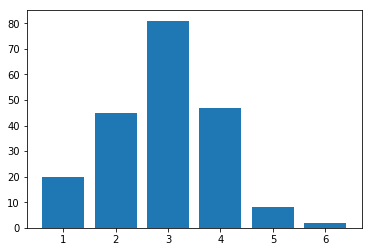

In [741]:
plt.bar(df.genres.apply(len).value_counts().sort_index().keys(),df.genres.apply(len).value_counts().sort_index())

In [742]:
df['status'].unique()

array(['Released'], dtype=object)

In [743]:
df['original_language'].unique()

array(['en', 'ja', 'es', 'fr', 'no', 'ko', 'zh', 'sv', 'cn', 'ru', 'id'],
      dtype=object)

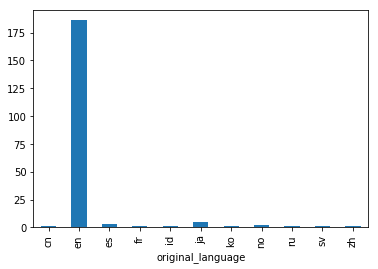

In [744]:
df.groupby(by='original_language')['original_language'].count().plot.bar()

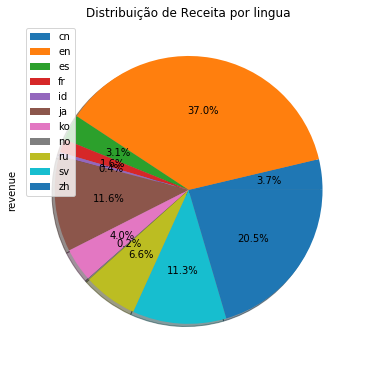

In [745]:
language = df.groupby(by='original_language')['revenue'].median()
language.plot.pie(figsize=(6, 7),autopct='%1.1f%%',shadow=True, labels=None)
plt.title('Distribuição de Receita por lingua')
plt.legend(labels=language.index, loc='upper left') 

In [746]:
del df['homepage']

In [747]:
del df['imdb_id']
del df['overview']

In [748]:
del df['poster_path']
df.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[Thriller, Horror]",en,V/H/S,7.820787,"[{'name': 'The Collective', 'id': 15156}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",7/28/12,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This collection is killer.,V/H/S,"[{'id': 6435, 'name': 'webcam'}, {'id': 9706, ...","[{'cast_id': 1, 'character': 'Gary', 'credit_i...","[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[Action, Documentary]",en,Cocaine Cowboys,2.941626,"[{'name': 'Rakontur', 'id': 6303}]","[{'iso_3166_1': 'US', 'name': 'United States o...",4/26/06,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How Miami became the cocaine capital of the Un...,Cocaine Cowboys,"[{'id': 2150, 'name': 'cocaine'}, {'id': 2231,...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe46179251416c7506cc15', 'de...",163000
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[Animation, Family, Comedy, Adventure]",en,Ice Age: The Meltdown,16.646029,"[{'name': 'Blue Sky Studios', 'id': 9383}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",3/23/06,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Ice age is melting away.,Ice Age: The Meltdown,"[{'id': 2078, 'name': 'mammoth'}, {'id': 2079,...","[{'cast_id': 1, 'character': 'Manny (voice)', ...","[{'credit_id': '52fe4292c3a36847f80292c9', 'de...",660940780
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[Adventure, Action, Thriller]",en,Casino Royale,23.065078,"[{'name': 'Eon Productions', 'id': 7576}, {'na...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",11/14/06,144.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone has a past. Every legend has a beginn...,Casino Royale,"[{'id': 131, 'name': 'italy'}, {'id': 383, 'na...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '53ac1fd7c3a3684bc8001908', 'de...",599045960
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[Action, Crime, Drama, Thriller]",en,The Fast and the Furious: Tokyo Drift,2.238808,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",6/3/06,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On the streets of Tokyo, speed needs no transl...",The Fast and the Furious: Tokyo Drift,"[{'id': 830, 'name': 'car race'}, {'id': 1926,...","[{'cast_id': 12, 'character': 'Sean Boswell', ...","[{'credit_id': '56784ed792514111900002c8', 'de...",158468292


In [749]:
df.production_companies = df.production_companies.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else ''))

In [750]:
del df['tagline']

In [751]:
df.production_countries = df.production_countries.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ''))

In [752]:
#Personagens
df.cast = df.cast.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
#Equipe
df.crew = df.crew.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
#Keywords
df.Keywords = df.Keywords.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
#Lingua:
df.spoken_languages = df.spoken_languages.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ''))


In [753]:
df.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[Thriller, Horror]",en,V/H/S,7.820787,"[The Collective, Bloody Disgusting, 8383 Produ...",[United States of America],7/28/12,116.0,[English],Released,V/H/S,"[webcam, anthology, vhs, burglary, split scree...","[Gary, Zak, Rock, Lily, Shane, Patrick, Clint,...","[Directing, Directing, Writing, Writing, Direc...",100345
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[Action, Documentary]",en,Cocaine Cowboys,2.941626,[Rakontur],[United States of America],4/26/06,118.0,[English],Released,Cocaine Cowboys,"[cocaine, drug dealer]","[Himself, Himself, Himself, Herself, Himself, ...",[Directing],163000
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[Animation, Family, Comedy, Adventure]",en,Ice Age: The Meltdown,16.646029,"[Blue Sky Studios, Twentieth Century Fox Anima...",[United States of America],3/23/06,91.0,[English],Released,Ice Age: The Meltdown,"[mammoth, sloth, ice age, barrier ice, ice mel...","[Manny (voice), Sid (voice), Diego (voice), El...","[Directing, Production, Sound, Editing, Writin...",660940780
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[Adventure, Action, Thriller]",en,Casino Royale,23.065078,"[Eon Productions, Stillking Films, Babelsberg ...","[Italy, United Kingdom, United States of Ameri...",11/14/06,144.0,"[English, Français]",Released,Casino Royale,"[italy, poker, casino, terrorist, banker, mone...","[James Bond, Vesper Lynd, Le Chiffre, M, Felix...","[Art, Writing, Editing, Writing, Art, Sound, S...",599045960
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[Action, Crime, Drama, Thriller]",en,The Fast and the Furious: Tokyo Drift,2.238808,[Universal Pictures],"[Japan, United States of America]",6/3/06,104.0,"[English, 日本語]",Released,The Fast and the Furious: Tokyo Drift,"[car race, car journey, car mechanic, auto, ca...","[Sean Boswell, Neela, Han Lue, Twinkie, D.K., ...","[Costume & Make-Up, Editing, Production, Produ...",158468292


In [754]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df['dayofweek'] = df.release_date.dt.dayofweek 

In [755]:
df.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,dayofweek
22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[Thriller, Horror]",en,V/H/S,7.820787,"[The Collective, Bloody Disgusting, 8383 Produ...",[United States of America],2012-07-28,116.0,[English],Released,V/H/S,"[webcam, anthology, vhs, burglary, split scree...","[Gary, Zak, Rock, Lily, Shane, Patrick, Clint,...","[Directing, Directing, Writing, Writing, Direc...",100345,5
40,41,"[{'id': 376970, 'name': 'Cocaine Cowboys', 'po...",0,"[Action, Documentary]",en,Cocaine Cowboys,2.941626,[Rakontur],[United States of America],2006-04-26,118.0,[English],Released,Cocaine Cowboys,"[cocaine, drug dealer]","[Himself, Himself, Himself, Herself, Himself, ...",[Directing],163000,2
46,47,"[{'id': 8354, 'name': 'Ice Age Collection', 'p...",80000000,"[Animation, Family, Comedy, Adventure]",en,Ice Age: The Meltdown,16.646029,"[Blue Sky Studios, Twentieth Century Fox Anima...",[United States of America],2006-03-23,91.0,[English],Released,Ice Age: The Meltdown,"[mammoth, sloth, ice age, barrier ice, ice mel...","[Manny (voice), Sid (voice), Diego (voice), El...","[Directing, Production, Sound, Editing, Writin...",660940780,3
60,61,"[{'id': 645, 'name': 'James Bond Collection', ...",150000000,"[Adventure, Action, Thriller]",en,Casino Royale,23.065078,"[Eon Productions, Stillking Films, Babelsberg ...","[Italy, United Kingdom, United States of Ameri...",2006-11-14,144.0,"[English, Français]",Released,Casino Royale,"[italy, poker, casino, terrorist, banker, mone...","[James Bond, Vesper Lynd, Le Chiffre, M, Felix...","[Art, Writing, Editing, Writing, Art, Sound, S...",599045960,1
69,70,"[{'id': 9485, 'name': 'The Fast and the Furiou...",85000000,"[Action, Crime, Drama, Thriller]",en,The Fast and the Furious: Tokyo Drift,2.238808,[Universal Pictures],"[Japan, United States of America]",2006-06-03,104.0,"[English, 日本語]",Released,The Fast and the Furious: Tokyo Drift,"[car race, car journey, car mechanic, auto, ca...","[Sean Boswell, Neela, Han Lue, Twinkie, D.K., ...","[Costume & Make-Up, Editing, Production, Produ...",158468292,5


In [756]:
df['dayofweek'].unique()

array([5, 2, 3, 1, 4, 0, 6], dtype=int64)

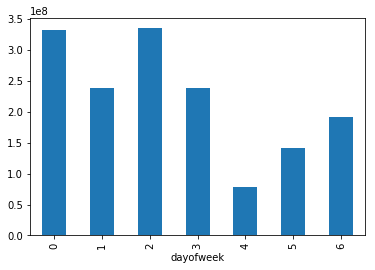

In [757]:
df.groupby(by='dayofweek')['revenue'].median().plot.bar()

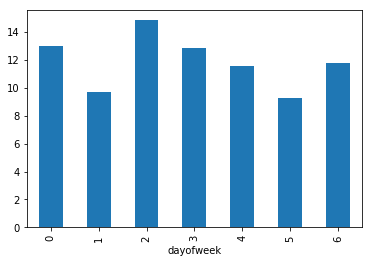

In [758]:
df.groupby(by='dayofweek')['popularity'].median().plot.bar()

In [759]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [760]:
df_test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [761]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [762]:
media=df_test['runtime'].mean()
df_test['runtime'].fillna(media, inplace=True)
#df_test['runtime'].replace(np.isnan,media)
#np.any(np.isnan(df_test['runtime']))

In [763]:
x_test = df_test[['runtime','budget','popularity']]

In [764]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4398 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [765]:
y_predict = modelo.predict(x_test)

In [766]:
y_predict

array([ 1.40804326e+07, -4.39276336e+07,  4.20126737e+07, ...,
        1.60654310e+08,  6.20002804e+07,  1.10530150e+07])

In [767]:
pd.DataFrame({'id': df_test.id, 'revenue': y_predict}).to_csv('sample_submission.csv', index=False)